### Wangling Data
In order to answer the questions asked in step 1, we are going to define some functions to start working with the data to get what we want.

At this point, it would be interesting to use a database to facilitate the integration of the two datasets, however, I will be using only python to browse the files for learning purposes.

In [1]:
import re
import os
import sys
import pandas as pd
# from utils import print_pretty
from statisticalAnalysis import meanTestFiltered, avgGrade

In [2]:
# Processed dataset path ENEM
enem_analysis_path = os.getcwd() + '/data/analysis/enem_analysis.csv'
enem_analysis_df = pd.read_csv(enem_analysis_path, delimiter=";")

# If you want to perform a quick test, uncomment this line.
# This line takes only 1% of the dataset evenly.
# enem_analysis_df = enem_analysis_df.drop(enem_analysis_df.index.difference([x for x in range(0, len(enem_analysis_df), 100)]))

print(enem_analysis_df.shape)
enem_analysis_df

(5513747, 41)


,registration,city_residence_code,city_residence,state_residence_code,state_residence,age,gender,matiral_status,color_race,nationality,...,presence_natural_science,presence_human_science,presence_languages,presence_math,grade_natural_science,grade_human_science,grade_languages,grade_math,essay_status,grade_essay
0,180008202043,5300108,Brasília,53,DF,44.0,M,1.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,180007197856,2111102,São João dos Patos,21,MA,23.0,F,0.0,3,1,...,1.0,1.0,1.0,1.0,521.0,568.7,513.1,480.3,1.0,280.0
2,180008517434,3530607,Mogi das Cruzes,35,SP,23.0,F,0.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,180007661228,2916401,Itapetinga,29,BA,26.0,F,0.0,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,180008787987,2918100,Jeremoabo,29,BA,20.0,M,0.0,0,1,...,0.0,1.0,1.0,0.0,0.0,419.9,345.8,0.0,1.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513742,180013945649,3304557,Rio de Janeiro,33,RJ,56.0,F,1.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5513743,180013964149,1302603,Manaus,13,AM,20.0,F,0.0,3,1,...,1.0,1.0,1.0,1.0,435.6,556.8,460.8,528.1,1.0,320.0
5513744,180013980226,3550308,São Paulo,35,SP,17.0,F,0.0,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5513745,180013934137,3509502,Campinas,35,SP,17.0,F,0.0,1,1,...,1.0,1.0,1.0,1.0,524.9,496.5,512.5,474.1,1.0,340.0


In [3]:
# Processed dataset path Brazil Cities
cities_analysis_path = os.getcwd() + '/data/analysis/cities_analysis.csv'
cities_analysis_df = pd.read_csv(cities_analysis_path, delimiter=";")

print(cities_analysis_df.shape)
cities_analysis_df

(5573, 11)


,city,state,capital,hdi_ranking,hdi,hdi_gni,hdi_life,hdi_education,longitude,latitude,altitude
0,Abadia De Goiás,GO,0,1689.0,0.708,0.687,0.830,0.622,-49.440548,-16.758812,893.60
1,Abadia Dos Dourados,MG,0,2207.0,0.690,0.693,0.839,0.563,-47.396832,-18.487565,753.12
2,Abadiânia,GO,0,2202.0,0.690,0.671,0.841,0.579,-48.718812,-16.182672,1017.55
3,Abaeté,MG,0,1994.0,0.698,0.720,0.848,0.556,-45.446191,-19.155848,644.74
4,Abaetetuba,PA,0,3530.0,0.628,0.579,0.798,0.537,-48.884404,-1.723470,10.12
...,...,...,...,...,...,...,...,...,...,...,...
5568,Xique-Xique,BA,0,4533.0,0.585,0.563,0.741,0.479,-42.725508,-10.824974,406.26
5569,Zabelê,PB,0,3639.0,0.623,0.567,0.725,0.587,-37.093552,-8.076874,646.34
5570,Zacarias,SP,0,1072.0,0.730,0.695,0.826,0.674,-50.055740,-21.050110,415.85
5571,Zé Doca,MA,0,4272.0,0.595,0.559,0.745,0.505,-45.657698,-3.275481,35.66


In [4]:
def gradeHDIRelation(enem, cities):
    import matplotlib.pyplot as plt
    import numpy as np
    %matplotlib inline
    
    mean_by_city = enem.groupby(['city_residence','state_residence']).mean()
    cities_avg = pd.merge(cities, mean_by_city, how='inner', left_on=['city','state'], right_on=['city_residence','state_residence'])
    df2 = cities_avg.sort_values(by=['hdi_education'])
    df = df2[~(df2 == 0).any(axis=1)]
    
    ax = plt.gca()

    df.plot(kind='line', x='hdi_education', y='grade_natural_science', ax=ax)
    df.plot(kind='line', x='hdi_education', y='grade_human_science', color='red', ax=ax)
    df.plot(kind='line', x='hdi_education', y='grade_languages', color='green', ax=ax)
    df.plot(kind='line', x='hdi_education', y='grade_math', color='yellow', ax=ax)
    df.plot(kind='line', x='hdi_education', y='grade_essay', color='black', ax=ax)
    
    return cities_avg

,city,state,capital,hdi_ranking,hdi,hdi_gni,hdi_life,hdi_education,longitude,latitude,altitude,grade_natural_science,grade_human_science,grade_languages,grade_math,grade_essay
0,Abadiânia,GO,0,2202.0,0.690,0.671,0.841,0.579,-48.718812,-16.182672,1017.55,325.803198,400.076744,375.171221,359.753198,371.220930
1,Abaeté,MG,0,1994.0,0.698,0.720,0.848,0.556,-45.446191,-19.155848,644.74,380.670680,461.745825,426.909515,423.378058,422.058252
2,Abaetetuba,PA,0,3530.0,0.628,0.579,0.798,0.537,-48.884404,-1.723470,10.12,357.614441,429.216694,395.237187,377.275849,387.089594
3,Abaiara,CE,0,3522.0,0.628,0.540,0.748,0.612,-39.047547,-7.356977,403.11,330.021765,391.920882,362.995294,352.748529,357.117647
4,Abaíra,BA,0,4086.0,0.603,0.577,0.746,0.510,-41.661608,-13.253532,674.22,331.857407,393.478704,358.870370,358.799074,374.074074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4229,Xique-Xique,BA,0,4533.0,0.585,0.563,0.741,0.479,-42.725508,-10.824974,406.26,348.208207,422.595238,388.119858,365.713475,366.869301
4230,Zabelê,PB,0,3639.0,0.623,0.567,0.725,0.587,-37.093552,-8.076874,646.34,345.284043,433.700000,388.953191,386.922340,346.595745
4231,Zacarias,SP,0,1072.0,0.730,0.695,0.826,0.674,-50.055740,-21.050110,415.85,357.466667,404.126667,365.206667,377.080000,362.222222
4232,Zé Doca,MA,0,4272.0,0.595,0.559,0.745,0.505,-45.657698,-3.275481,35.66,336.499214,409.066026,381.638253,357.956419,333.903930


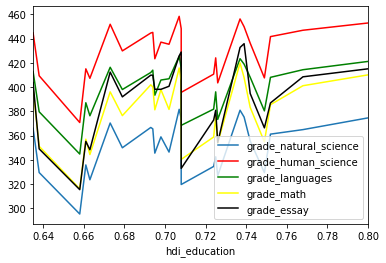

In [5]:

gradeHDIRelation( enem_analysis_df
                     .filter([ 'city_residence'
                              ,'state_residence'
                              ,'grade_natural_science'
                              ,'grade_human_science'
                              ,'grade_languages'
                              ,'grade_math'
                              ,'grade_essay'
                             ])
                 ,cities_analysis_df
                )

In [6]:
enem = enem_analysis_df.filter([ 'city_residence'
                              ,'state_residence'
                              ,'grade_natural_science'
                              ,'grade_human_science'
                              ,'grade_languages'
                              ,'grade_math'
                              ,'grade_essay'
                             ])

# grade_per_city = []
# for i, city in cities_analysis_df.iterrows():
#     mean_df = enem.groupby(['city_residence','state_residence']).mean()
#     mean
#     if i > 100:
#         break

In [7]:
import numpy as np

# a = enem.loc[(enem['city_residence'] == 'Brasília') & (enem['state_residence'] == 'DF')]
b = [ { col: enem.loc[(enem['city_residence'] == 'Brasília') & (enem['state_residence'] == 'DF')]\
           .replace(0, np.NaN)[col].mean()} for col in list(filter(lambda col: re.search("grade", col), enem.columns))]
b

[{'grade_natural_science': 505.9919091824791},
 {'grade_human_science': 580.8638329851733},
 {'grade_languages': 542.6767185671399},
 {'grade_math': 545.481500993765},
 {'grade_essay': 537.084580740895}]

In [8]:
m = enem.groupby(['city_residence','state_residence']).mean()

In [9]:
# new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])

p = pd.merge(cities_analysis_df, m, how='inner', left_on=['city','state'], right_on=['city_residence','state_residence'])
p

,city,state,capital,hdi_ranking,hdi,hdi_gni,hdi_life,hdi_education,longitude,latitude,altitude,grade_natural_science,grade_human_science,grade_languages,grade_math,grade_essay
0,Abadiânia,GO,0,2202.0,0.690,0.671,0.841,0.579,-48.718812,-16.182672,1017.55,325.803198,400.076744,375.171221,359.753198,371.220930
1,Abaeté,MG,0,1994.0,0.698,0.720,0.848,0.556,-45.446191,-19.155848,644.74,380.670680,461.745825,426.909515,423.378058,422.058252
2,Abaetetuba,PA,0,3530.0,0.628,0.579,0.798,0.537,-48.884404,-1.723470,10.12,357.614441,429.216694,395.237187,377.275849,387.089594
3,Abaiara,CE,0,3522.0,0.628,0.540,0.748,0.612,-39.047547,-7.356977,403.11,330.021765,391.920882,362.995294,352.748529,357.117647
4,Abaíra,BA,0,4086.0,0.603,0.577,0.746,0.510,-41.661608,-13.253532,674.22,331.857407,393.478704,358.870370,358.799074,374.074074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4229,Xique-Xique,BA,0,4533.0,0.585,0.563,0.741,0.479,-42.725508,-10.824974,406.26,348.208207,422.595238,388.119858,365.713475,366.869301
4230,Zabelê,PB,0,3639.0,0.623,0.567,0.725,0.587,-37.093552,-8.076874,646.34,345.284043,433.700000,388.953191,386.922340,346.595745
4231,Zacarias,SP,0,1072.0,0.730,0.695,0.826,0.674,-50.055740,-21.050110,415.85,357.466667,404.126667,365.206667,377.080000,362.222222
4232,Zé Doca,MA,0,4272.0,0.595,0.559,0.745,0.505,-45.657698,-3.275481,35.66,336.499214,409.066026,381.638253,357.956419,333.903930
